In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import machine learning libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
# Check columns
print(profiles.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [5]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [6]:
# Exploring the data
print(f"Nnumber of signs: {profiles['sign'].nunique()}")
print(f"Signs: {profiles['sign'].unique()}")

Nnumber of signs: 48
Signs: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it 

In [7]:
# Cleaning labels
profiles['sign_cleaned'] = profiles['sign'].str.split().str.get(0)

In [8]:
print(f"Nnumber of signs: {profiles['sign_cleaned'].nunique()}")
print(f"Signs: {profiles['sign_cleaned'].unique()}")

Nnumber of signs: 12
Signs: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


In [9]:
print(profiles['sign_cleaned'].value_counts())

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_cleaned, dtype: int64


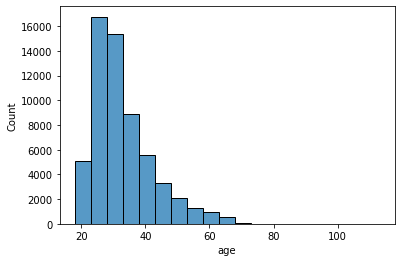

In [10]:
# Continous variables
## age

sns.histplot(data=profiles, x='age', binwidth=5);

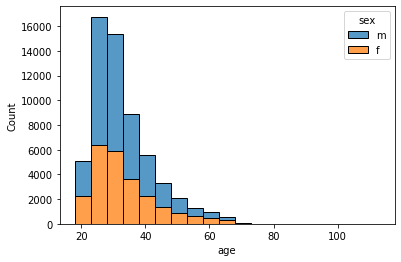

In [11]:
sns.histplot(data=profiles, x='age', hue='sex', binwidth=5, multiple='stack');

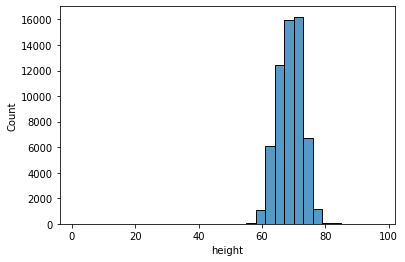

In [12]:
# height
sns.histplot(data=profiles, x='height', binwidth=3);

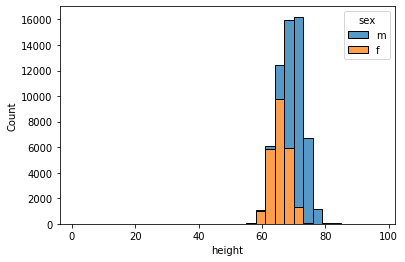

In [13]:
sns.histplot(data=profiles, x='height', hue='sex', binwidth=3, multiple='stack');

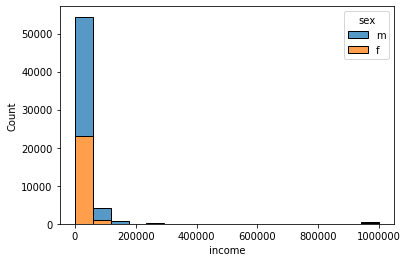

In [14]:
# income
sns.histplot(data=profiles, x='income', hue='sex', multiple='stack');

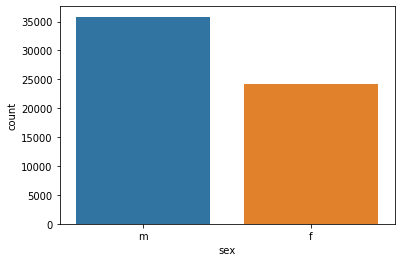

In [15]:
# discrete variables
## sex
sns.countplot(data=profiles, x='sex');

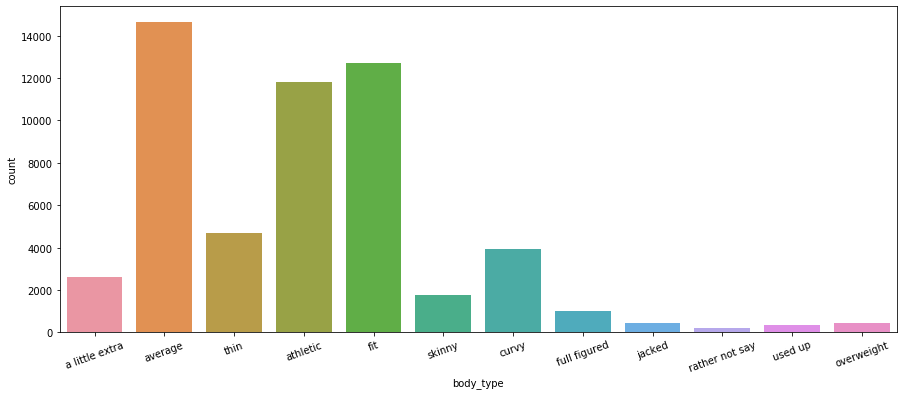

In [16]:
## body type
plt.figure(figsize=(15, 6))
sns.countplot(data=profiles, x='body_type')
plt.xticks(rotation=20)
plt.show()

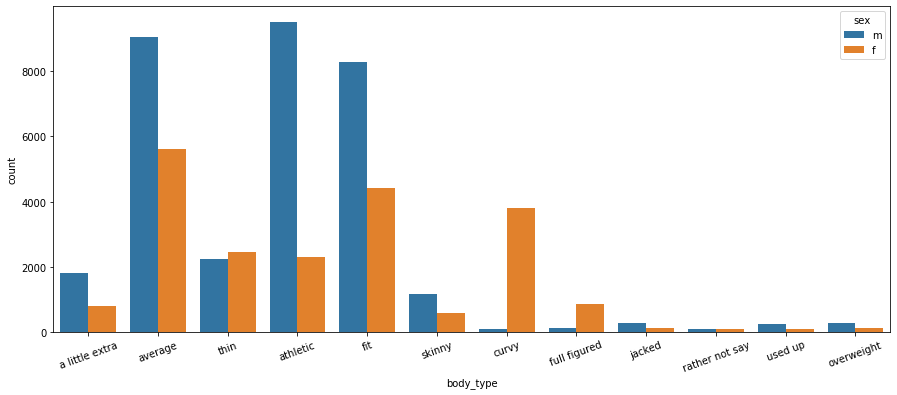

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(data=profiles, x='body_type', hue='sex')
plt.xticks(rotation=20)
plt.show()

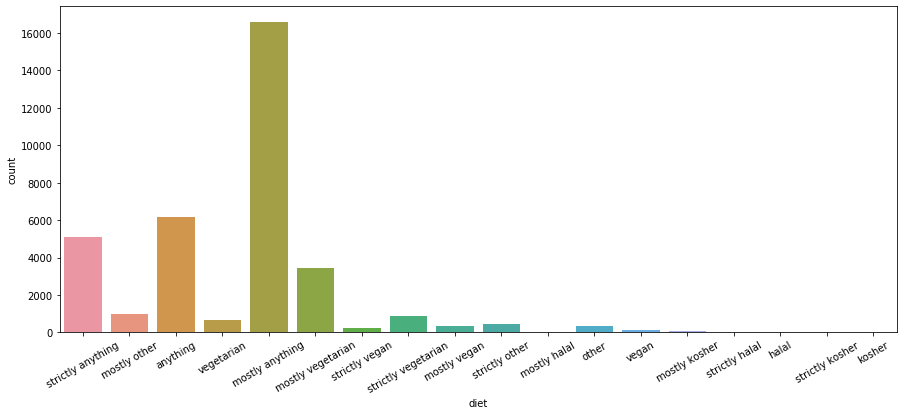

In [18]:
# diet
plt.figure(figsize=(15, 6))
sns.countplot(data=profiles, x='diet')
plt.xticks(rotation=30)
plt.show()

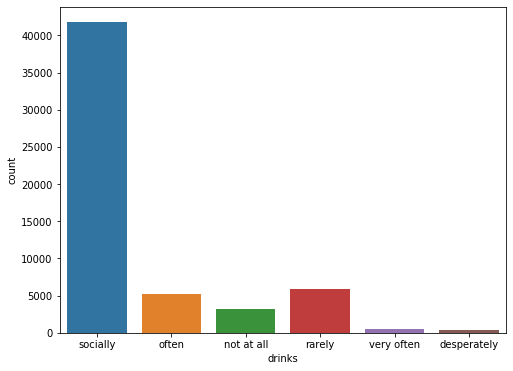

In [19]:
# drinks
plt.figure(figsize=(8, 6))
sns.countplot(data=profiles, x='drinks');

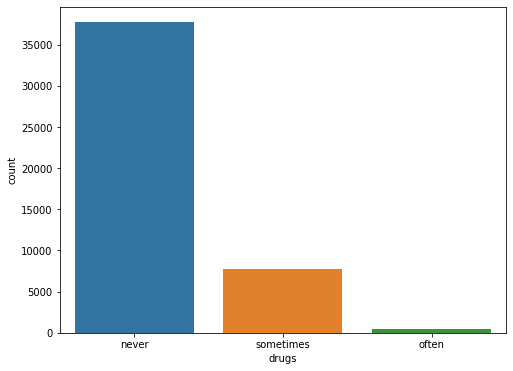

In [20]:
# drugs
plt.figure(figsize=(8, 6))
sns.countplot(data=profiles, x='drugs');

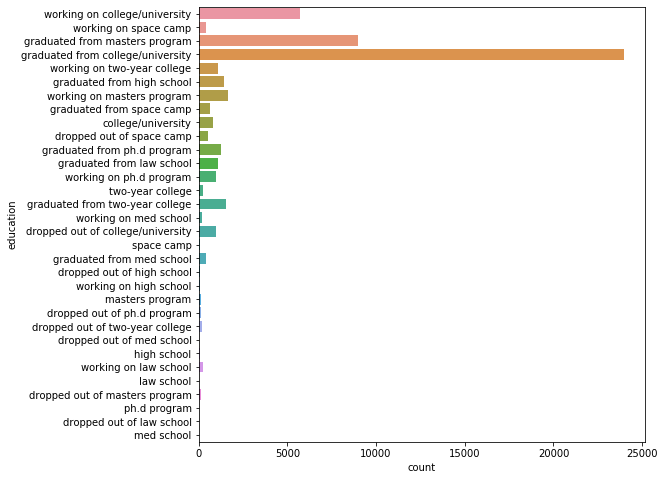

In [21]:
# education
plt.figure(figsize=(8, 8))
sns.countplot(data=profiles, y='education');

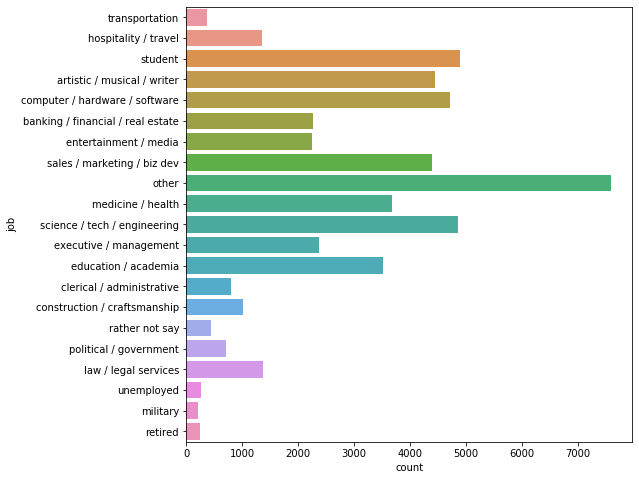

In [22]:
# job
plt.figure(figsize=(8, 8))
sns.countplot(data=profiles, y='job');

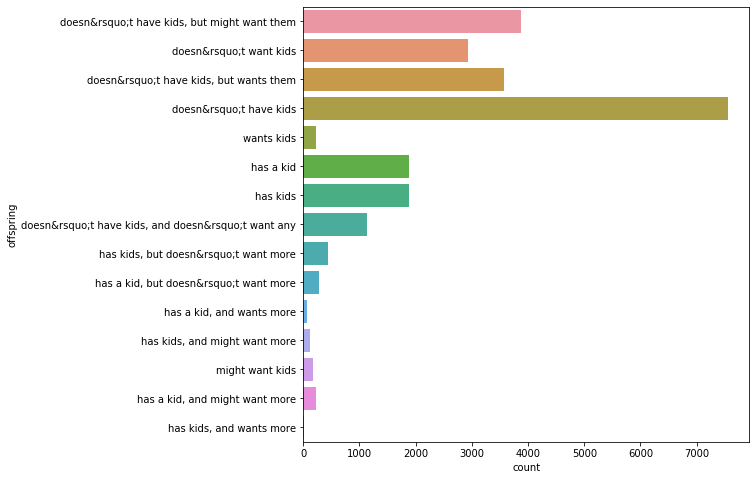

In [23]:
# offspring
plt.figure(figsize=(8, 8))
sns.countplot(data=profiles, y='offspring');

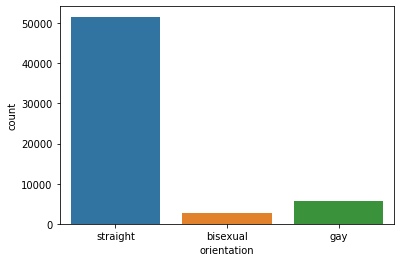

In [24]:
# orientation

sns.countplot(data=profiles, x='orientation');

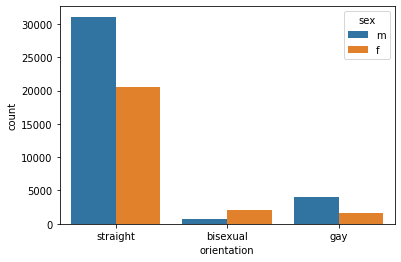

In [25]:
sns.countplot(data=profiles, x='orientation', hue='sex');

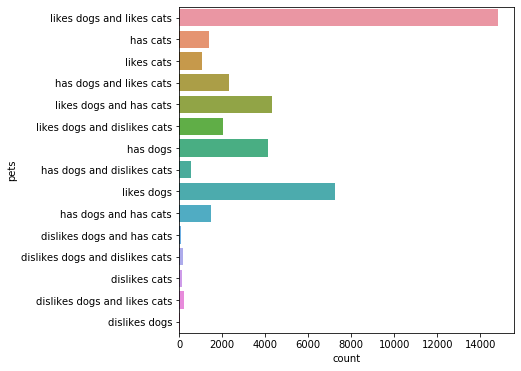

In [26]:
# pets
plt.figure(figsize=(6, 6))
sns.countplot(data=profiles, y='pets');

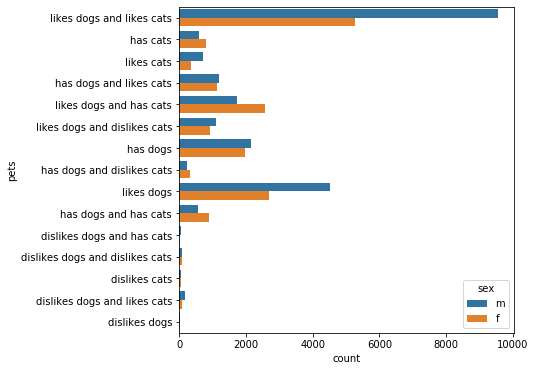

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(data=profiles, y='pets', hue='sex');

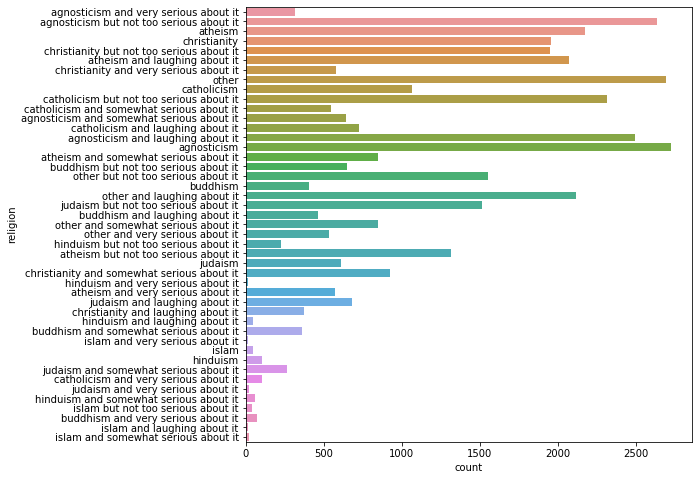

In [28]:
# religion
plt.figure(figsize=(8, 8))
sns.countplot(data=profiles, y='religion');

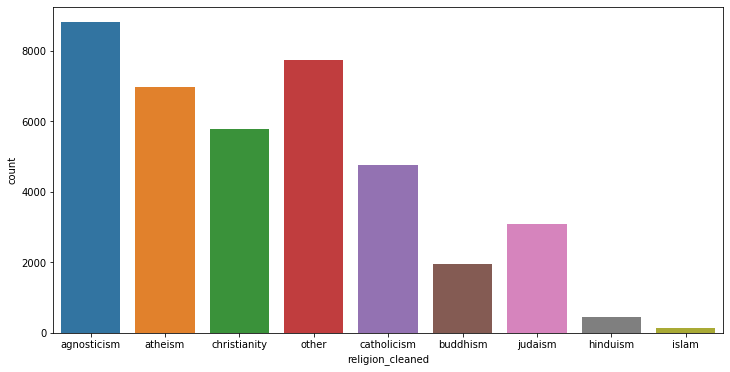

In [29]:
profiles['religion_cleaned'] = profiles['religion'].str.split().str.get(0)

plt.figure(figsize=(12, 6))
sns.countplot(data=profiles, x='religion_cleaned');

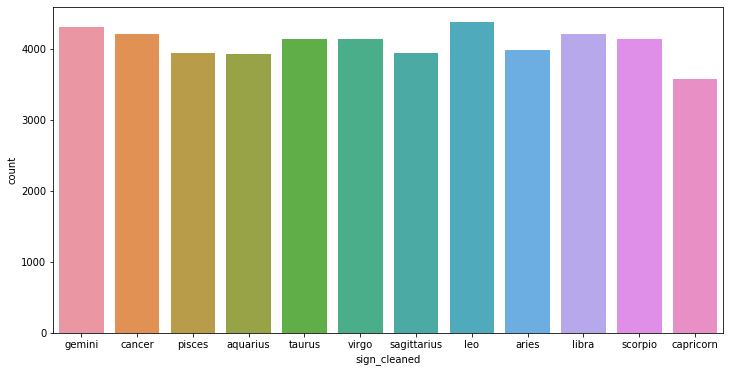

In [30]:
# sign
plt.figure(figsize=(12, 6))
sns.countplot(data=profiles, x='sign_cleaned');

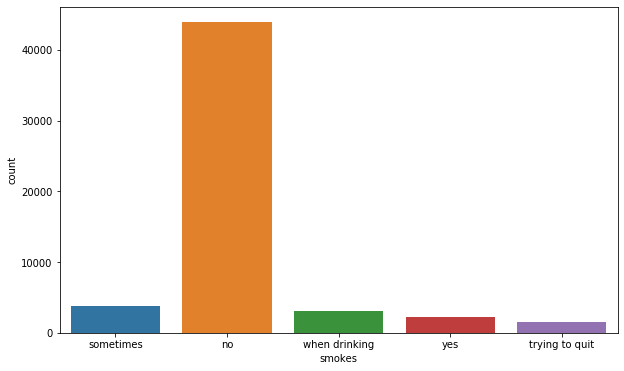

In [31]:
# Smoking
plt.figure(figsize=(10, 6))
sns.countplot(data=profiles, x='smokes');

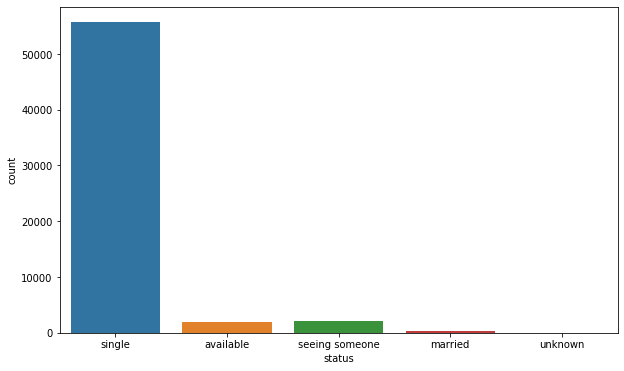

In [32]:
# status
plt.figure(figsize=(10, 6))
sns.countplot(data=profiles, x='status');

In [33]:
# Preparing the data

## Looking for missing values

print(profiles.isnull().sum())

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
sign_cleaned        11056
religion_cleaned    20226
dtype: int64


In [34]:
# Dropping missing values
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'sign_cleaned']
df = profiles[cols].dropna()
print(df.shape)

(16453, 8)


In [35]:
df.head()

,body_type,diet,orientation,pets,religion_cleaned,sex,job,sign_cleaned
0,a little extra,strictly anything,straight,likes dogs and likes cats,agnosticism,m,transportation,gemini
1,average,mostly other,straight,likes dogs and likes cats,agnosticism,m,hospitality / travel,cancer
5,average,mostly anything,straight,likes cats,atheism,m,computer / hardware / software,taurus
7,average,mostly anything,straight,likes dogs and likes cats,christianity,f,artistic / musical / writer,sagittarius
9,athletic,mostly anything,straight,likes dogs and likes cats,atheism,m,student,cancer


In [36]:
# get dummies
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix=[col])

In [37]:
df.head()

,sign_cleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Splitting data

col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

val_size = 0.25

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=0)

y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

In [50]:
# Predictions

# Logistic Regression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)
lr_predictions = lr_model.predict(X_train)
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



In [51]:
# K Nearest Neighbor

knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_predictions = knn_model.predict(X_train)
print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.65      0.36       968
       aries       0.25      0.51      0.34       983
      cancer       0.29      0.43      0.35      1129
   capricorn       0.33      0.34      0.33       882
      gemini       0.37      0.32      0.35      1130
         leo       0.39      0.28      0.32      1121
       libra       0.39      0.23      0.29      1028
      pisces       0.39      0.25      0.31       997
 sagittarius       0.45      0.18      0.26       965
     scorpio       0.42      0.20      0.28      1001
      taurus       0.43      0.25      0.31      1045
       virgo       0.42      0.27      0.33      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.37      0.33      0.32     12339



In [52]:
# Decision Trees

cart_model = DecisionTreeClassifier().fit(X_train, y_train)
cart_predictions = cart_model.predict(X_train)
print(classification_report(y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



In [53]:
cart_cm = confusion_matrix(y_train, cart_predictions)
cart_labels = cart_model.classes_

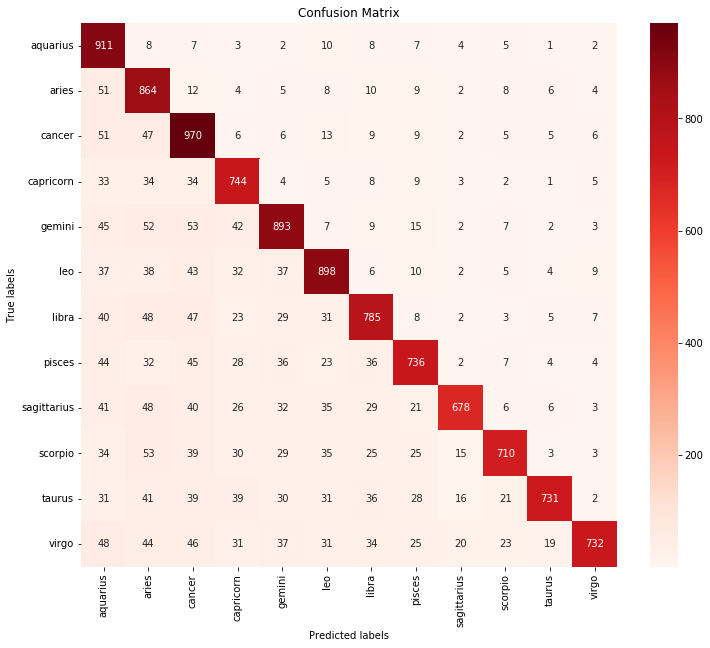

In [54]:
plt.figure(figsize=(12, 10))
ax = plt.subplot()
sns.heatmap(cart_cm, annot=True, cmap='Reds', ax = ax,fmt='d');

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels);
ax.yaxis.set_ticklabels(cart_labels);

In [55]:
cart_model.get_depth()

49

In [57]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print(f"Baseline: {round(results.mean()*100, 2)}% -- {round(results.std()*100, 2)}%")

[0.08508914 0.0923825  0.09400324 0.09886548 0.09079854]
Baseline: 9.22% -- 0.45%


In [58]:
cart_model20 = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
cart_predictions20 = cart_model20.predict(X_train)
print(classification_report(y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.56      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.54      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.65      0.33      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.35      0.40      0.37      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.46      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



In [60]:
results20 = cross_val_score(cart_model20, X_train, y_train, cv=kfold, scoring='accuracy')
print(results20)

print(f"Baseline: {round(results20.mean()* 100, 2)}% -- {round(results20.std()*100, 2)}%")

[0.07617504 0.08387358 0.08711507 0.08265802 0.08998784]
Baseline: 8.4% -- 0.47%


In [61]:
knn_predictions_val = knn_model.predict(X_val)
print(classification_report(y_val, knn_predictions_val))

              precision    recall  f1-score   support

    aquarius       0.08      0.22      0.12       294
       aries       0.09      0.18      0.12       345
      cancer       0.09      0.15      0.11       328
   capricorn       0.06      0.06      0.06       315
      gemini       0.08      0.06      0.07       366
         leo       0.10      0.07      0.08       395
       libra       0.10      0.06      0.08       326
      pisces       0.07      0.05      0.06       337
 sagittarius       0.08      0.03      0.05       347
     scorpio       0.08      0.04      0.05       355
      taurus       0.07      0.04      0.05       345
       virgo       0.08      0.05      0.06       361

    accuracy                           0.08      4114
   macro avg       0.08      0.08      0.08      4114
weighted avg       0.08      0.08      0.07      4114



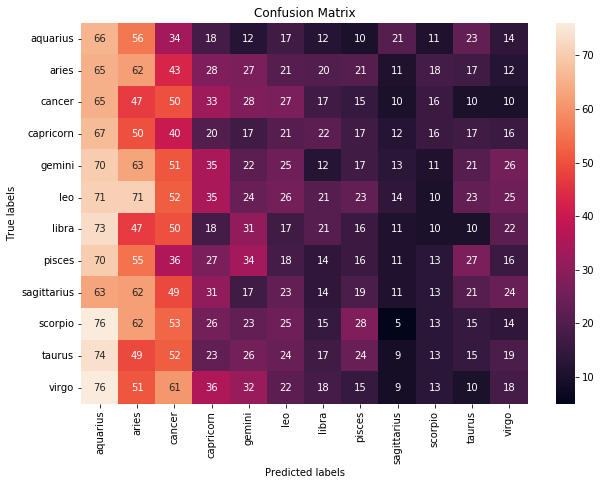

In [62]:
final_cm = confusion_matrix(y_val, knn_predictions_val)
knn_labels = knn_model.classes_

plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(final_cm, annot=True, ax=ax, fmt='d');

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels);
ax.yaxis.set_ticklabels(cart_labels);